<a href="https://colab.research.google.com/github/mahdiehmortazavi/SVHNImaging/blob/main/SVHN_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the SVHN Dataset

In [2]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=7f6af0c835fc28369ca5838f4bfba38f393b00ef27b161ad284317fd067c893b
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [14]:
import wget
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
train_url = "http://ufldl.stanford.edu/housenumbers/train_32x32.mat"
test_url = "http://ufldl.stanford.edu/housenumbers/test_32x32.mat"
extra_url = "http://ufldl.stanford.edu/housenumbers/extra_32x32.mat"

train_data = wget.download(train_url)
train_data = 'train_32x32.mat'
test_data = wget.download(test_url)
test_data = 'test_32x32.mat'
extra_data = wget.download(extra_url)
extra_data = 'extra_32x32.mat'

In [ ]:
train_data

'train_32x32.mat'

In [16]:
#type of origin file is matlab
data_train = loadmat(train_data)
data_test = loadmat(test_data)
data_extra = loadmat(extra_data)

## EDA

In [ ]:
#output is as a tuple
type(data_train), type(data_test)

(dict, dict)

In [ ]:
data_train.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [17]:
X_train = data_train['X']
X_test = data_test['X']
X_extra = data_extra['X']

X_train = np.transpose(X_train, (3, 0, 1, 2))
X_test = np.transpose(X_test, (3, 0, 1, 2))
X_extra = np.transpose(X_extra, (3, 0, 1, 2))

X_train = np.concatenate((X_train, X_extra[:10000]))

X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0
X_extra = X_extra.astype(np.float32) / 255.0

y_train = data_train['y']
y_test = data_test['y']
y_extra = data_extra['y']

y_train = np.concatenate((y_train, y_extra[:10000]))

y_train = np.where(y_train==10, 0, y_train)
y_test = np.where(y_test==10, 0, y_test)
y_extra = np.where(y_extra==10, 0, y_extra)


In [ ]:
X_train.shape

(123257, 32, 32, 3)

In [ ]:
# onehot-encoding labels
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Label of 32485th image is: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


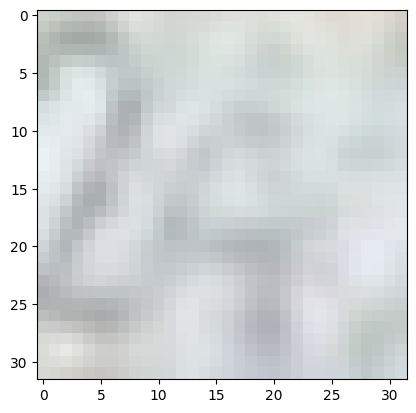

In [ ]:
i = np.random.randint(1, len(X_train))
print(f"Label of {i}th image is: {y_train[i]}")
plt.imshow(X_train[i,:,:,:])

In [18]:
# model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, Dropout
from keras.optimizers import Adam

model = Sequential()
model.add(InputLayer(input_shape=X_train[0].shape))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

model.add(Flatten())
#overfitting handling
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(len(y_train[0]), activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dropout (Dropout)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 256)               2769152   
                                                      

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=1, validation_split=0.1)

In [ ]:
score = model.evaluate(X_test, y_test)
print("test loss: ",  score[0])
print("test accuracy: ",  score[1])

In [21]:
model.save("model.h5")

In [ ]:
# @title
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
model.input_shape